## Задание
<img src="https://github.com/paantya/exoplanet-2017/blob/master/ngeBrzSQhdo.jpg?raw=true">

In [4]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#from urllib.request import urlretrieve
from scipy.integrate import odeint
import pandas as pd
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import sys
#import os

# Enable inline plotting
%matplotlib nbagg
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
#print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.13.3
Pandas version 0.20.3
Matplotlib version 2.1.0


In [70]:
def fun(date, t,sigm,b,r):
    x = date[0]
    y = date[1]
    z = date[2]
    d = ((-x+y)*sigm,
         r*x-y-x*z,
         -b*z+x*y)         
    return vstack(d).ravel()

In [71]:
def var1(i0):
    date0 = array([0.01 + 0.005*i0,
                   0.01 + 0.005*i0,
                   0.00])
    sigm0 = 10
    b0 = 8./3.
    r0 = 32 + i0
    return date0,sigm0,b0,r0


def var2(i0):
    date0 = array([0.0 + 0.005*i0,
                   0.0 + 0.005*i0,
                   0.00])
    sigm0 = 10
    b0 = 8./3.
    r0 = 23 - i0
    return date0,sigm0,b0,r0


In [86]:
%%time

i = 2

begin,end = 0, 50.

t = linspace(begin,end, 10 ** 5)

date1,sigm1,b1,r1 = var1(i)
esult1 = odeint(fun, date1, t, args=(sigm1,b1,r1))

date2,sigm2,b2,r2 = var2(i)
result2 = odeint(fun, date2, t, args=(sigm2,b2,r2))

Wall time: 632 ms


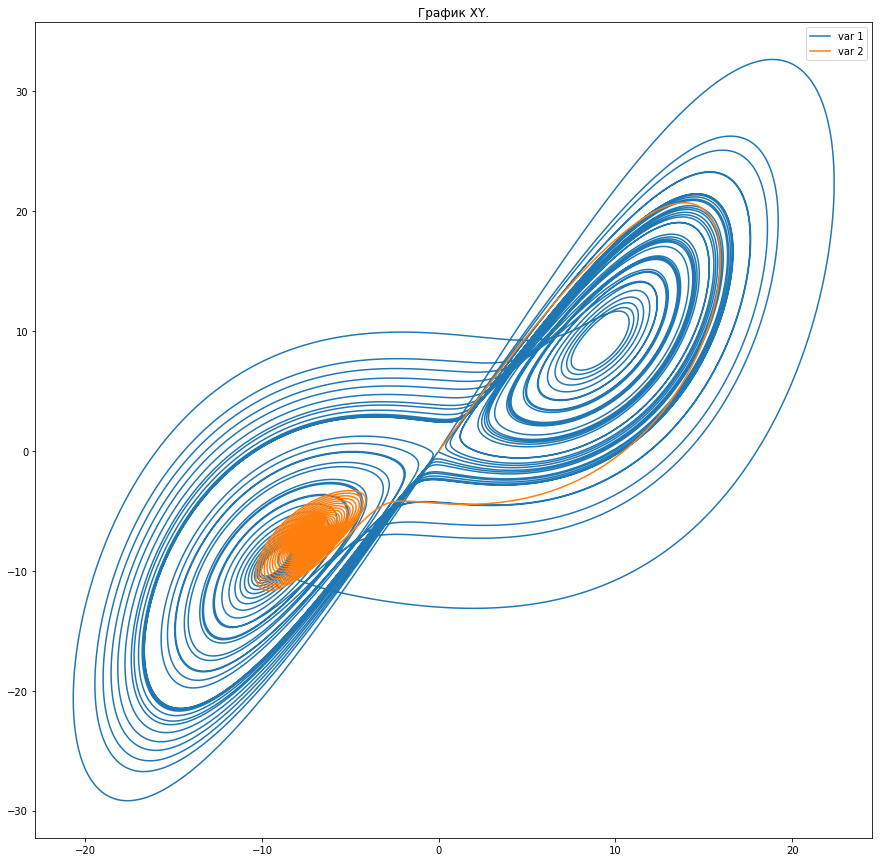

In [87]:
plt.figure(figsize=(15,15))

plt.title('График XY.'.format())
plt.plot([i[0] for i in result1] ,[i[1] for i in result1], label="var 1");
plt.plot([i[0] for i in result2] ,[i[1] for i in result2], label="var 2",);
plt.legend(('var 1', 'var 2'));

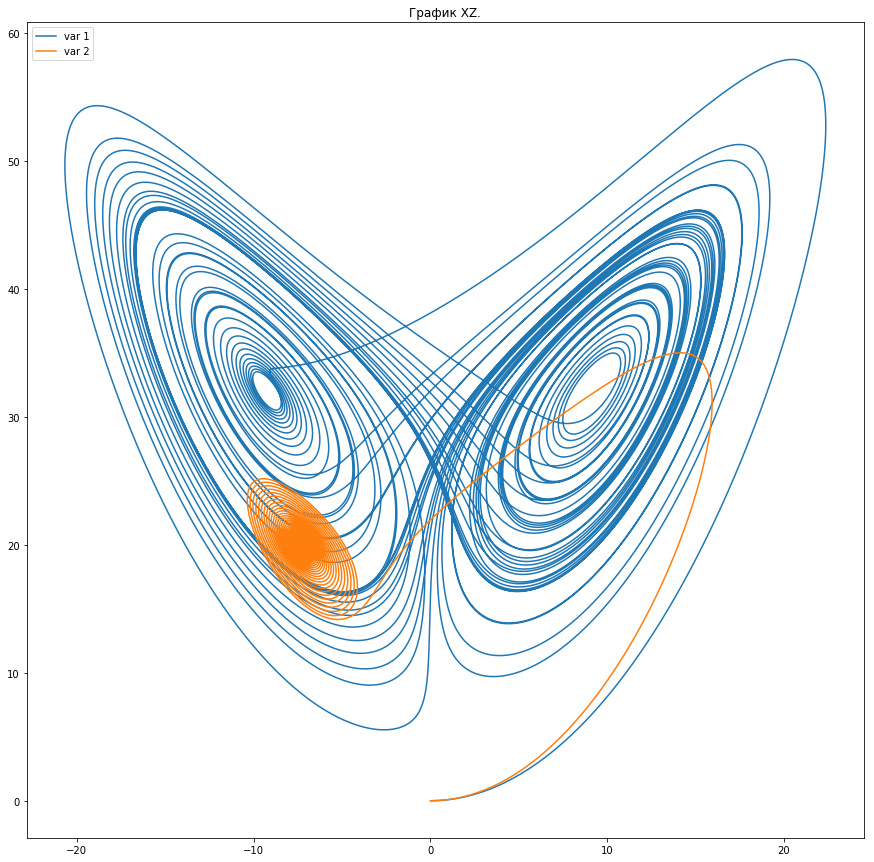

In [88]:
plt.figure(figsize=(15,15))

plt.title('График XZ.'.format())
plt.plot([i[0] for i in result1] ,[i[2] for i in result1], label="var 1");
plt.plot([i[0] for i in result2] ,[i[2] for i in result2], label="var 2",);
plt.legend(('var 1', 'var 2'));

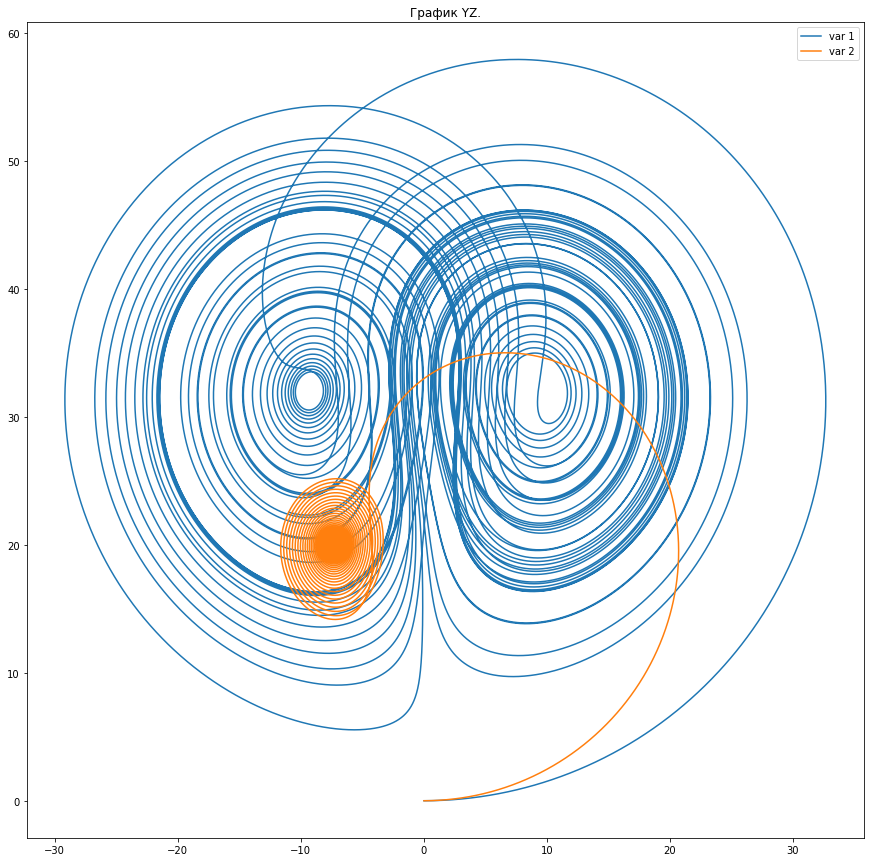

In [89]:
plt.figure(figsize=(15,15))

plt.title('График YZ.'.format())
plt.plot([i[1] for i in result1] ,[i[2] for i in result1], label="var 1");
plt.plot([i[1] for i in result2] ,[i[2] for i in result2], label="var 2",);
plt.legend(('var 1', 'var 2'));

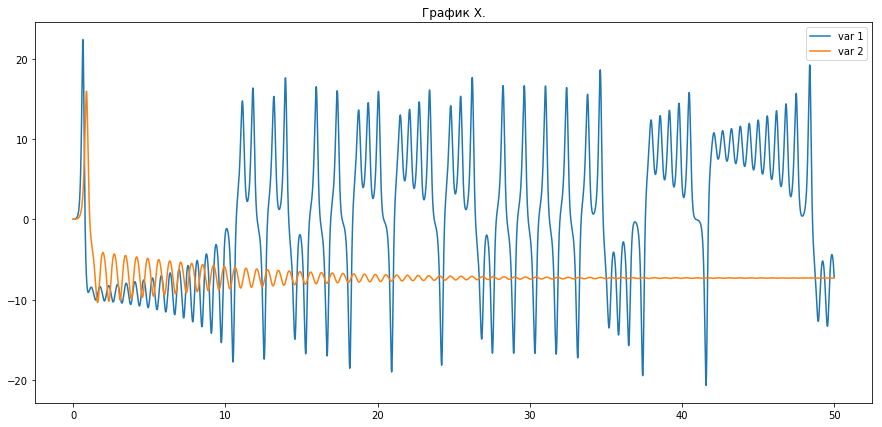

In [90]:
plt.figure(figsize=(15,7))

plt.title('График X.'.format())
plt.plot(t ,[i[0] for i in result1],t ,[i[0] for i in result2],);
plt.legend(('var 1', 'var 2'));

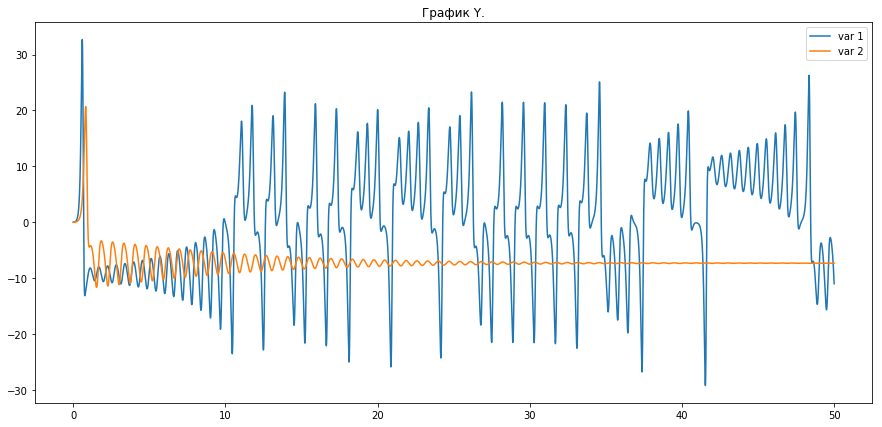

In [91]:
plt.figure(figsize=(15,7))

plt.title('График Y.'.format())
plt.plot(t ,[i[1] for i in result1],t ,[i[1] for i in result2],);
plt.legend(('var 1', 'var 2'));

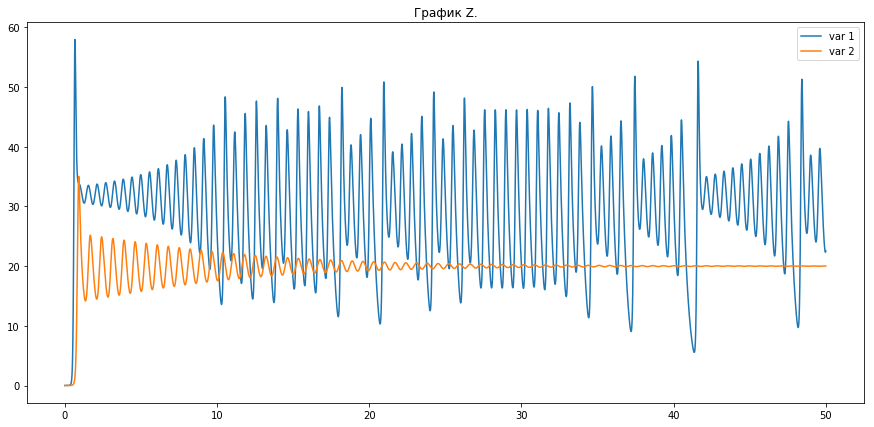

In [92]:
plt.figure(figsize=(15,7))

plt.title('График Z.'.format())
plt.plot(t ,[i[2] for i in result1],t ,[i[2] for i in result2],);
plt.legend(('var 1', 'var 2'));